In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.spatial.distance import cdist

## import the library below:

In [13]:
from PyEyeSim import EyeData


In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Step 1. 

#### read .csv file containing fixations for all stimuli and participants in a single file with pandas

In [15]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged_fixations.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0)
print(np.shape(FixData))


(48675, 19)


In [16]:
FixData

,id,task,sid,eye,stimfile,trialid,start_ms,end_ms,duration_ms,fix_x,fix_y,orig_fix_x,orig_fix_y,disp_x,disp_y,aoi_subline,aoi_line,class_id,label
0,0,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328491.191,328683.159,195.970,161.4900,160.5,161.4900,170.9400,0.594205,0.705880,NaN,NaN,0,non-dyslexic
1,1,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,328747.177,328995.193,252.016,338.1850,160.5,338.1850,171.8650,0.422989,0.336236,line_001-part_001,line_001,0,non-dyslexic
2,2,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329063.199,329423.075,363.875,450.4050,160.5,450.4050,168.0550,1.145977,0.658192,line_001-part_002,line_001,0,non-dyslexic
3,3,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329483.064,329743.065,264.002,582.0225,160.5,582.0225,161.0100,0.424336,0.370587,line_001-part_003,line_001,0,non-dyslexic
4,4,T1_Syllables,1003,b,s7_stimuli_t1.jpg,12,329775.070,330143.065,371.993,467.5750,160.5,467.5750,168.8450,0.640545,0.806104,line_001-part_002,line_001,0,non-dyslexic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48670,334,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1961417.270,1962009.528,596.258,1088.0100,750.5,1088.0100,746.2650,0.730936,0.781587,line_007-part_012,line_007,1,dyslexic
48671,335,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962017.528,1962309.460,295.932,1131.6575,750.5,1131.6575,748.9950,0.823347,1.023660,line_007-part_013,line_007,1,dyslexic
48672,336,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962401.460,1962829.128,431.659,1091.3025,750.5,1091.3025,740.7075,0.480914,0.701434,line_007-part_012,line_007,1,dyslexic
48673,337,T5_Pseudo_Text,1996,b,s7_stimuli_t5.jpg,166,1962853.077,1964713.191,1864.113,1150.5975,750.5,1150.5975,748.6900,1.752710,1.072156,line_007-part_013,line_007,1,dyslexic


## Step 2

#### pass pandas dataframe, to pyeyesim, providing information on screen size in pixels

(we run the pipeline here because this nb is to demonstrate the inference pipeline not the descriptives)


dataset size:  (48675, 19)
presentation size:  x= 1680 pixels y= 1050  pixels
presentation size:  x= 1680 pixels y= 1050  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 70 subjects, and 3 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
s7_stimuli_t1.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t4.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
s7_stimuli_t5.jpg
stimulus size in y is full screen
stimulus size in x full screen
 
stimuli loaded succesfully, access as self.images
run descriptive analysis
Data for  70 observers and  3  stimuli.
Mean fixation number:  231.79  +/-  6

(array(['s7_stimuli_t1.jpg', 's7_stimuli_t4.jpg', 's7_stimuli_t5.jpg'],
       dtype=object),
 array([1003, 1009, 1016, 1019, 1021, 1033, 1038, 1040, 1058, 1065, 1073,
        1075, 1082, 1090, 1095, 1109, 1113, 1115, 1134, 1145, 1160, 1166,
        1169, 1174, 1186, 1187, 1189, 1209, 1235, 1254, 1255, 1257, 1258,
        1263, 1271, 1274, 1284, 1300, 1312, 1314, 1318, 1322, 1345, 1349,
        1350, 1377, 1380, 1398, 1405, 1417, 1421, 1459, 1476, 1571, 1582,
        1591, 1626, 1693, 1729, 1744, 1760, 1858, 1859, 1869, 1879, 1903,
        1913, 1929, 1993, 1996], dtype=int64))

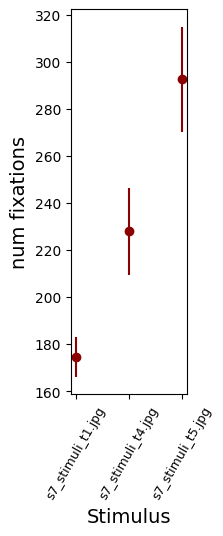

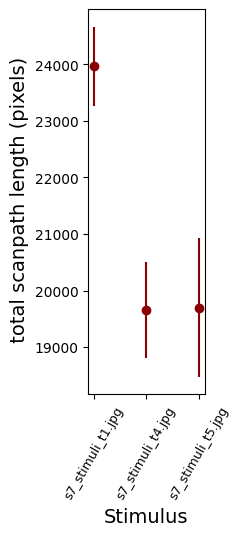

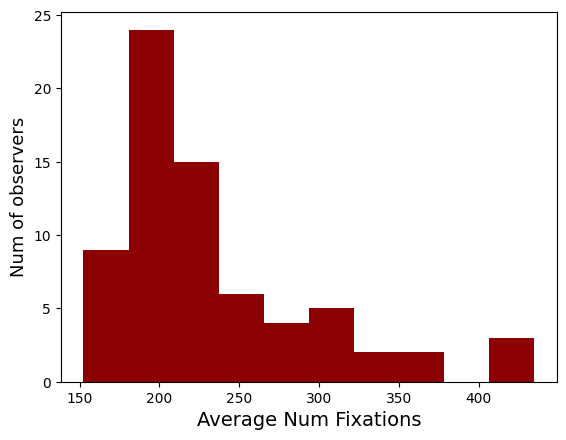

In [17]:

sizeX,sizeY=1680,1050


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(FixDuration='length',Stimulus='stimfile',subjectID='sid',StimPath=Path+'images/',StimExt='.jpg', mean_x='fix_x', mean_y='fix_y')
DyslexiaDat.RunDescriptiveFix(Visual=1)


In [18]:
DyslexiaDat.GetGroups('class_id')

Conditions [0 1]


(array([0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]),
 array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1], dtype=object))

In [8]:
def plot_multiple_simulations(self, stim_list, models_list, simulated_X_list, simulated_Y_list, n_components_list_list, new_list_len_list, labels=None):
    """
    Plot a 1x3 grid of simulated data for multiple sets of inputs.

    Parameters
    ----------
    stim_list : list
        List of stimulus numbers for each set of data (length 3).
        
    models_list : list
        List of lists, where each sublist contains fitted GaussianHMM models for each set of data.
        
    simulated_X_list : list
        List of lists of simulated X-axis eye movement data for each set of data.
        
    simulated_Y_list : list
        List of lists of simulated Y-axis eye movement data for each set of data.
        
    n_components_list_list : list
        List of lists, where each sublist contains the numbers of components for each set of data.
        
    new_list_len_list : list
        List of lists of fixation lengths for each scanpath for each set of data.
    """

    # if all the same stimulus, make the int a list
    if isinstance(stim_list, int) or isinstance(stim_list, float):
        stim_list = [stim_list for _ in range(3)]

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    fig.suptitle('Comparison of Simulated Data for Different Models', fontsize=18)

    # Flatten the axes for easier access in a loop
    axes = axes.ravel()

    for i in range(3):
        stim = stim_list[i]
        models = models_list[i]
        simulated_X = simulated_X_list[i]
        simulated_Y = simulated_Y_list[i]
        n_components_list = n_components_list_list[i]
        new_list_len = new_list_len_list[i]
        
        if labels is None:
            axes[i].set_title(f'Simulated Fixation for Model {i}', fontsize=12)
        else:
            x = new_list_len[0]
            if isinstance(x, np.ndarray):
                s = len(x)
                x = sum(x)
            else:
                s = 1
            axes[i].set_title(f'{labels[i]}, {x} fixation per {s} subjects', fontsize=12)

        for j, (n_components, sim_X, sim_Y, model) in enumerate(zip(n_components_list, simulated_X, simulated_Y, models)):
            self.VisHMM(np.column_stack((sim_X, sim_Y)), model, ax=axes[i], stim=stim, lengths=new_list_len)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Lets start to work with the HMM and firstly examinate the best number of components with BIC

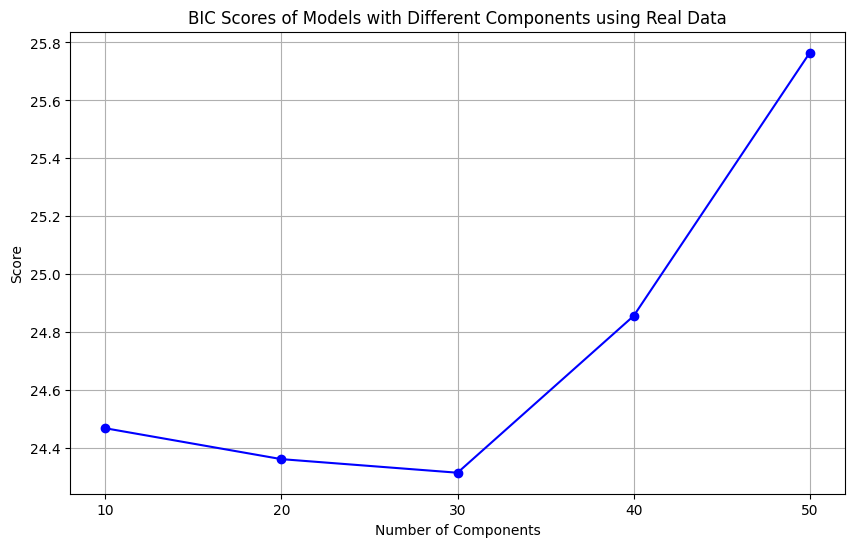

In [ ]:
modelg1 = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[1], [10,20,30,40,50], group=[0,1], n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

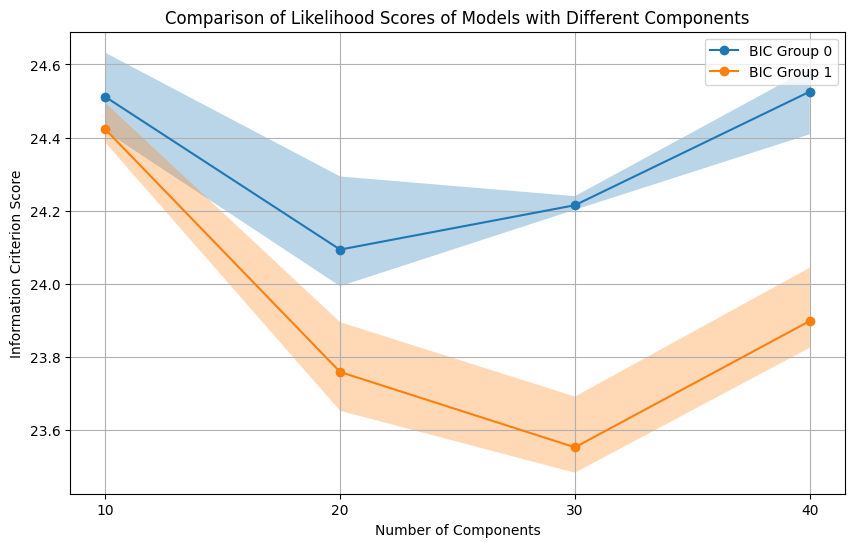

In [107]:
modelg1 = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[1], [10,20,30,40], group=[0,1], starting_tests=3, n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

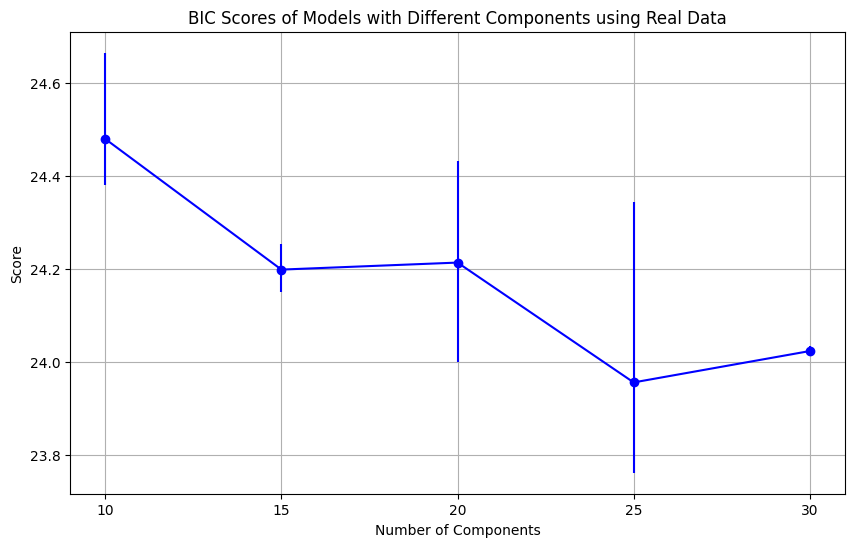

In [12]:
modelg0 = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[1], [10,15,20,25,30], group=0, starting_tests=3, n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

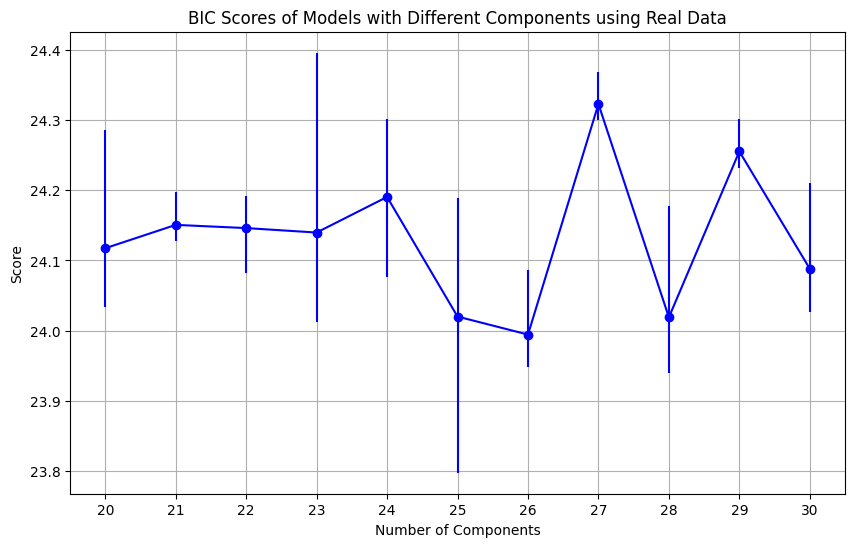

In [14]:
modelg0 = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[1], [20,21,22,23,24,25,26,27,28,29,30], group=0, starting_tests=3, n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

So for the group 0 (Non-Dyslexic) we can assume 25 as best number of component even if there is high difference between the worst and best model.

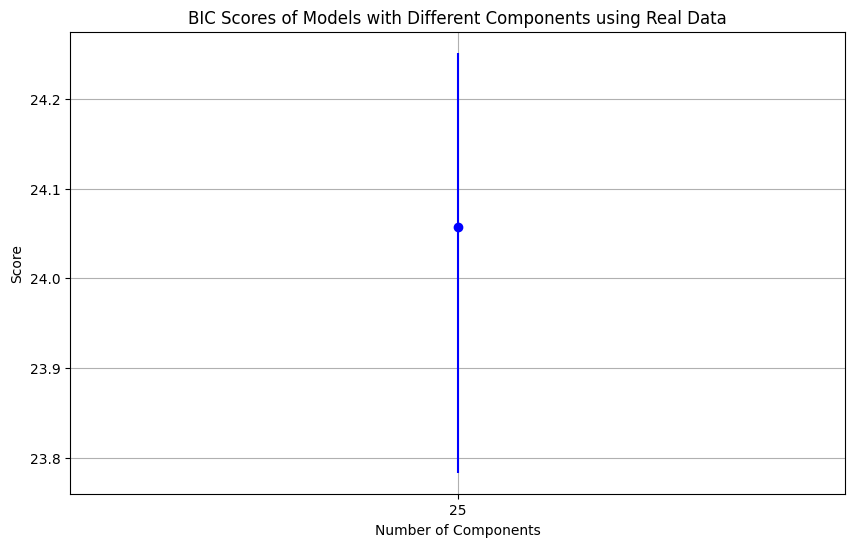

In [15]:
modelg0 = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[1], [25], group=0, starting_tests=10, n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

Now we can explore also the group 1

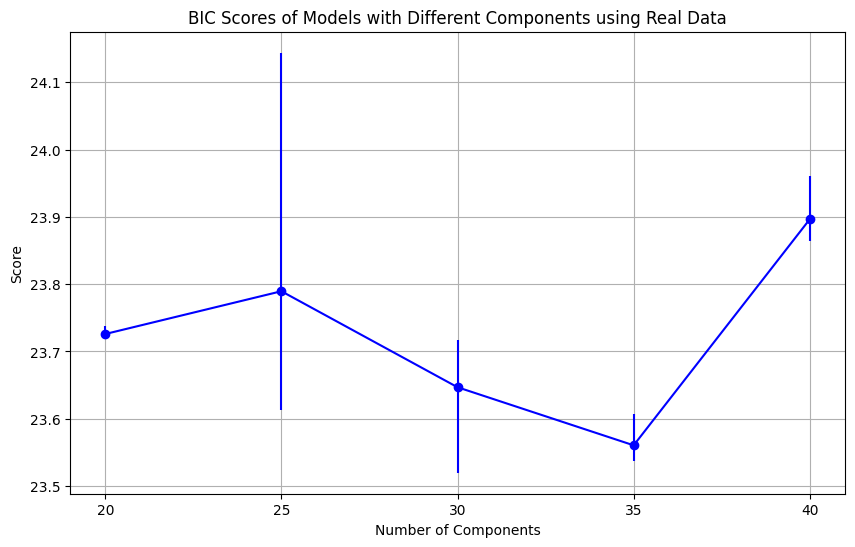

In [ ]:
modelg1 = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[1], [20,25,30,35,40], group=1, starting_tests=3, n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

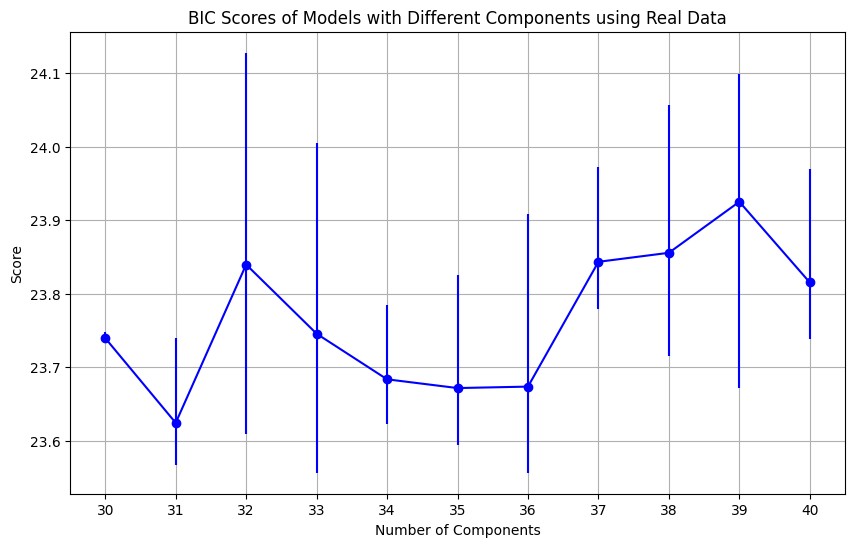

In [13]:
modelg1 = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[1], [30,31,32,33,34,35,36,37,38,39,40], group=1, starting_tests=3, n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

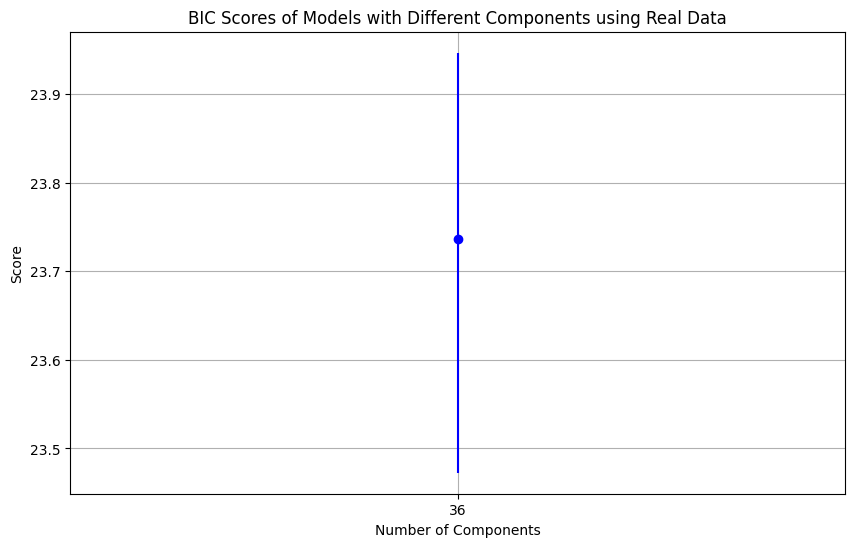

In [14]:
modelg1 = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[1], [36], group=1, starting_tests=10, n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

Now that we find for both the group an optimal number of components we can split the dataset in train and test, retrain the two models and then try to classify the test data

In [18]:
# select 5 random subjects from group 0,1 (5 random number from 0 to 34)
rand_subj = list(np.random.choice(35, 5, replace=False))
print(rand_subj)

[9, 29, 8, 4, 33]


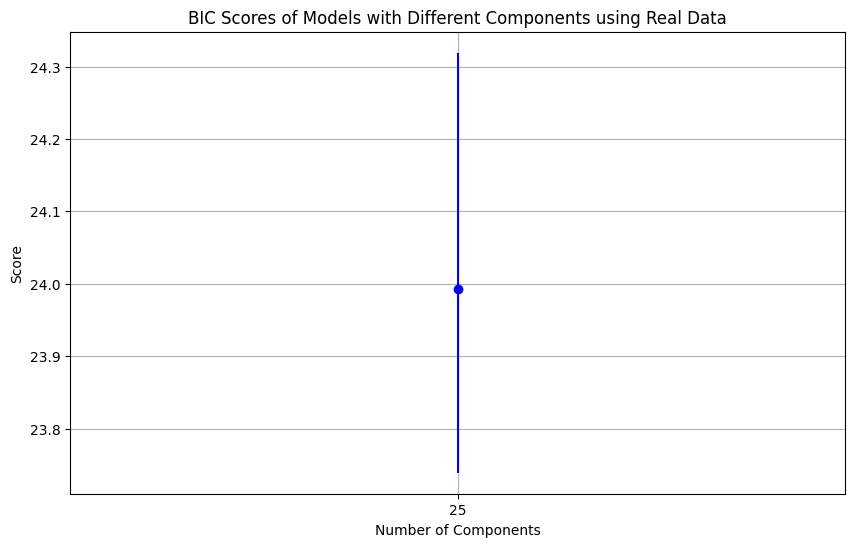

In [106]:
modelg0 = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[1], [25], group=0, subject=rand_subj, remove_subj=True, starting_tests=10, n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

In [107]:
modelg0 = modelg0[0][0][0][0]

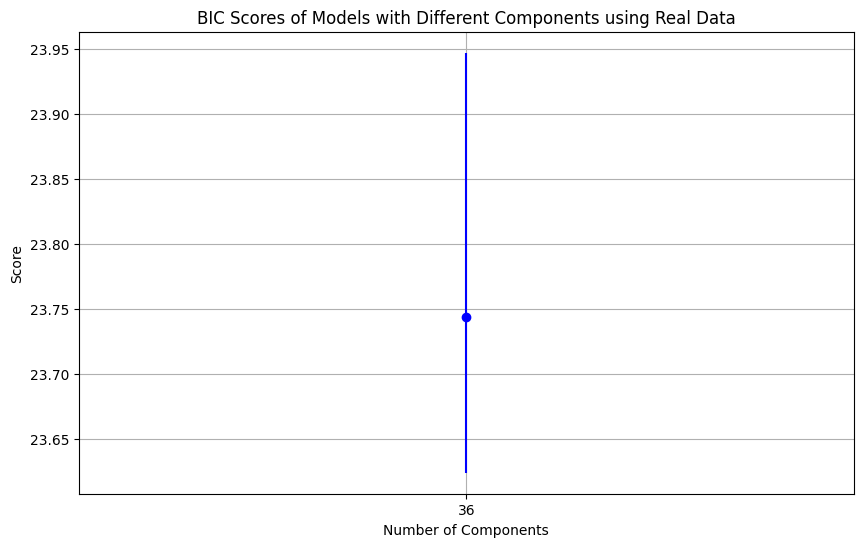

In [108]:
modelg1 = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[1], [36], group=1, subject=rand_subj, remove_subj=True, starting_tests=10, n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

In [109]:
modelg1 = modelg1[0][0][0][0]

In [110]:
def get_subj_data(stimn, group, subject):
    XX, YY, l = DyslexiaDat.get_data(DyslexiaDat.stimuli[stimn], group=group, subject=subject)
    return XX, YY, l

In [111]:
group0truelab = []
group0falsetrue = []
group1truelab = []
group1falsetrue = []

for g in [0,1]:
    for s in rand_subj:
        XX, YY, l = get_subj_data(1, g, int(s))
        s0 = modelg0.score(np.column_stack((XX, YY)))
        s1 = modelg1.score(np.column_stack((XX, YY)))
        
    for g in [0,1]:
        for s in rand_subj:
            XX, YY, l = get_subj_data(1, g, int(s))
            s0 = modelg0.score(np.column_stack((XX, YY)))
            s1 = modelg1.score(np.column_stack((XX, YY)))
            
            if g == 0:
                if s0 > s1:
                    group0truelab.append(s)
                else:
                    group1falsetrue.append(s)
            else:
                if s1 > s0:
                    group1truelab.append(s)
                else:
                    group0falsetrue.append(s)

print(group0truelab)
print(group0falsetrue)
print(group1truelab)
print(group1falsetrue)



[]
[]
[9, 29, 8, 4, 33, 9, 29, 8, 4, 33]
[9, 29, 8, 4, 33, 9, 29, 8, 4, 33]


In this case the problem could be the difference of components.

Lets procede using the same number of components for both the group.

---

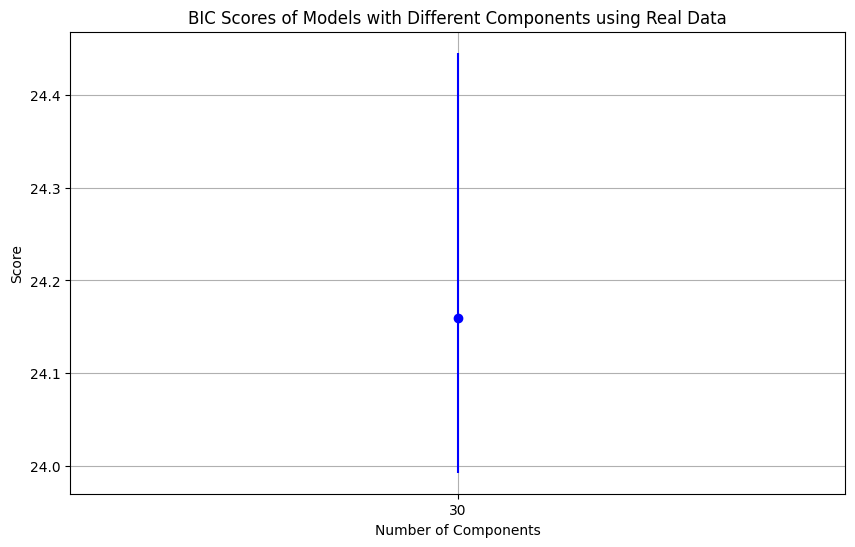

In [99]:
modelg0 = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[1], [30], group=0, subject=rand_subj, remove_subj=True, starting_tests=10, n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

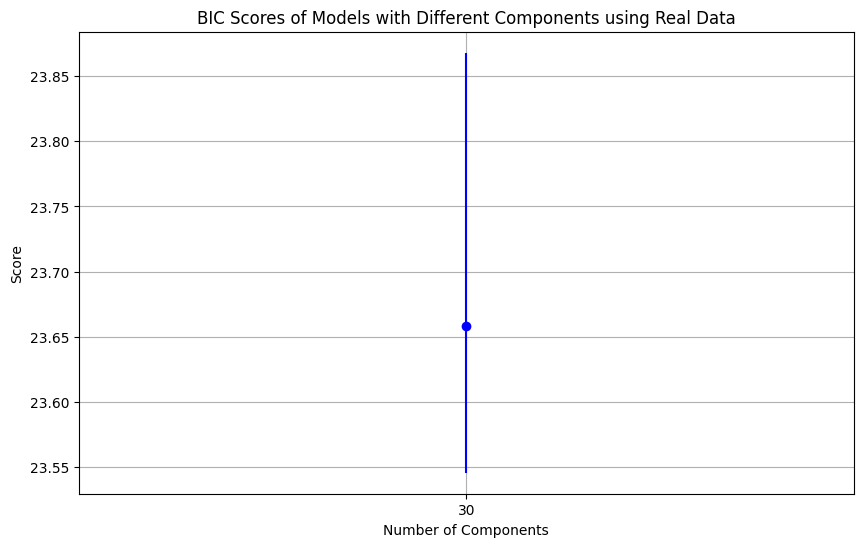

In [100]:
modelg1 = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[1], [30], group=1, subject=rand_subj, remove_subj=True, starting_tests=10, n_iter=100, only_starting=True, only_bic=True, covariance_type='spherical')

In [101]:
modelg0 = modelg0[0][0][0][0]
modelg1 = modelg1[0][0][0][0]

In [ ]:
group0truelab = []
group0falsetrue = []
group1truelab = []
group1falsetrue = []

for g in [0,1]:
    for s in rand_subj:
        XX, YY, l = get_subj_data(1, g, int(s))
        s0 = modelg0.score(np.column_stack((XX, YY)))
        s1 = modelg1.score(np.column_stack((XX, YY)))
        
        if g == 0:
            if s0 > s1:
                group0truelab.append(s)
            else:
                group1falsetrue.append(s)
        else:
            if s1 > s0:
                group1truelab.append(s)
            else:
                group0falsetrue.append(s)

print(group0truelab)
print(group0falsetrue)
print(group1truelab)
print(group1falsetrue)

[29, 8, 4, 33]
[9]
[29, 8, 4, 33]
[9]


---

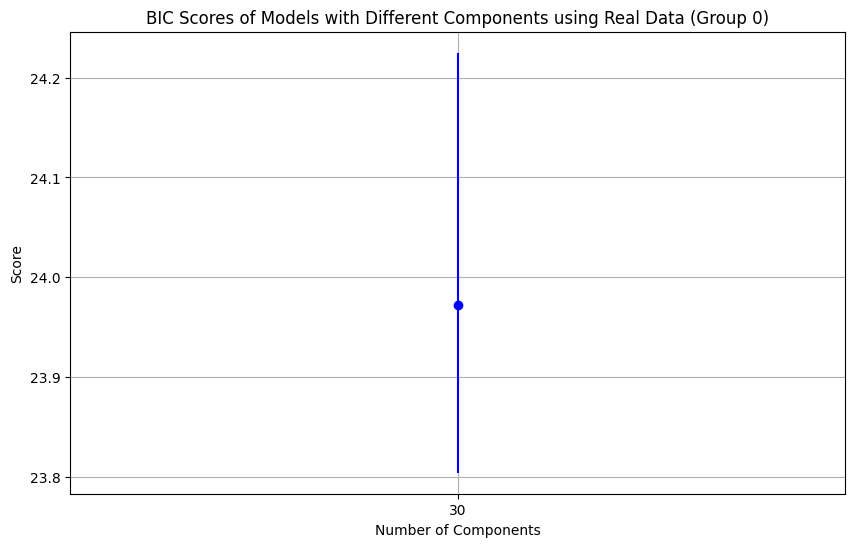

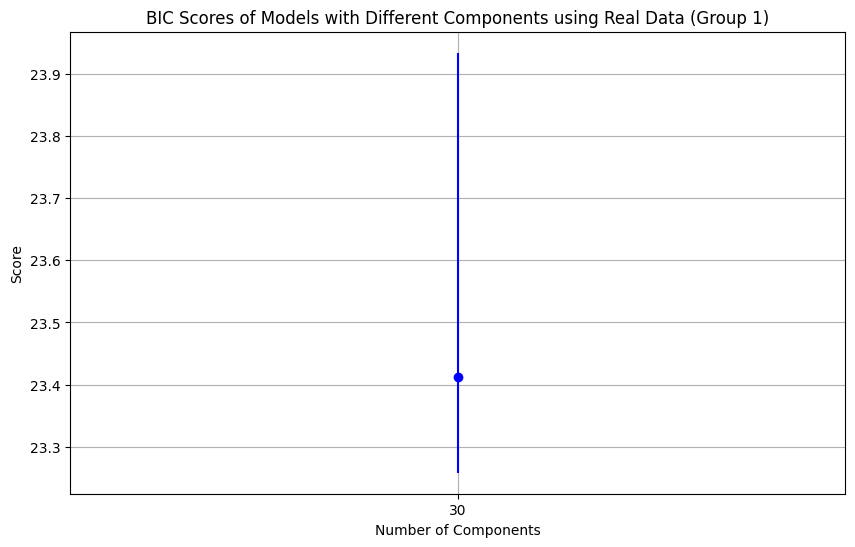

In [221]:
models = DyslexiaDat.models_pipeline(DyslexiaDat.stimuli[1], [30], group=[0,1], subject=rand_subj, remove_subj=True, starting_tests=10, n_iter=1000, only_starting=True, only_bic=True, covariance_type='spherical')

In [ ]:
modelg0 = models[0][0][0][0]
modelg1 = models[1][0][0][0]

In [224]:
group0truelab = []
group0falsetrue = []
group1truelab = []
group1falsetrue = []

for g in [0,1]:
    for s in rand_subj:
        XX, YY, l = get_subj_data(1, g, int(s))
        s0 = modelg0.score(np.column_stack((XX, YY)))
        s1 = modelg1.score(np.column_stack((XX, YY)))
        
        if g == 0:
            if s0 > s1:
                group0truelab.append(s)
            else:
                group1falsetrue.append(s)
        else:
            if s1 > s0:
                group1truelab.append(s)
            else:
                group0falsetrue.append(s)

print(group0truelab)
print(group0falsetrue)
print(group1truelab)
print(group1falsetrue)

[9, 8, 4, 33]
[8]
[9, 29, 4, 33]
[29]


resolution x = 1680  y = 1050
dimensions= (70, 1050, 1680)
reduced dims (70, 132, 210)
Conditions [0 1]
num observers in group 1: 35
num observers in group 2: 35
100 permutations starting


97.2007701995587

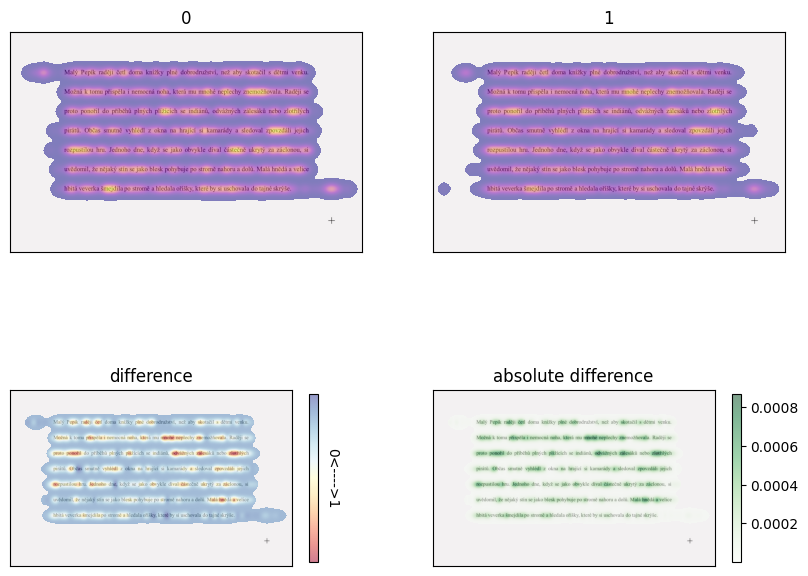

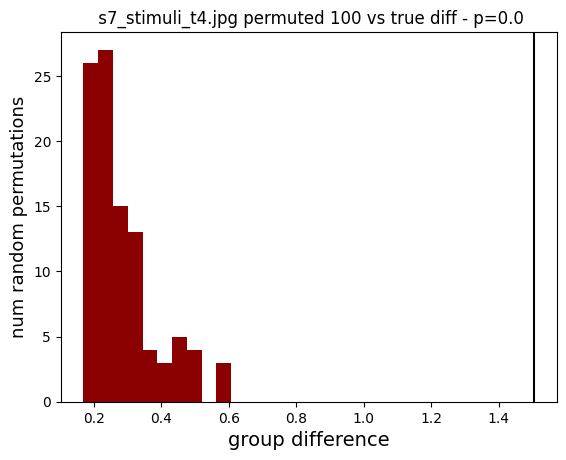

In [33]:
DyslexiaDat.CompareGroupsHeatmap(DyslexiaDat.stimuli[1],'class_id', SD=15)

Conditions [0 1]


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\statshelper.py:55: RuntimeWarning: divide by zero encountered in log2
  LogP=np.log2(StatP)


(10, 10)
(10, 10)
num significant uncorrected:  7
num significant Bonferroni - Holm corrected:  0.0


(array([[        nan,         nan,         nan,         nan,         nan,
                 nan,         nan,         nan,         nan,         nan],
        [ 2.29058212,  0.73089929, -0.6498547 , -0.06363871, -1.26050463,
          1.5244183 ,  0.46034192,  0.04817244,  0.55902477,         nan],
        [        nan, -1.17569411, -0.2629053 , -1.78310438, -1.8437053 ,
         -1.66052616, -0.29387605,  0.43960936, -0.22341691,         nan],
        [        nan, -1.26457631, -1.95635239,  0.65156831,  0.56034676,
         -1.288252  , -2.30702832, -0.97393744, -1.08524453,         nan],
        [        nan,  0.14345646,  1.51259367, -1.06612876,  0.32343552,
          1.73684161, -1.02814979, -0.2886653 , -0.32337866, -1.        ],
        [        nan, -0.29035793, -1.45976382,  0.03643025,  0.98512664,
         -1.40672754, -0.67559646,  0.57347   ,  1.11758982,         nan],
        [        nan,  0.81957276,  1.89715075,  2.06038408, -0.55967869,
          0.32933035,  2.7453332

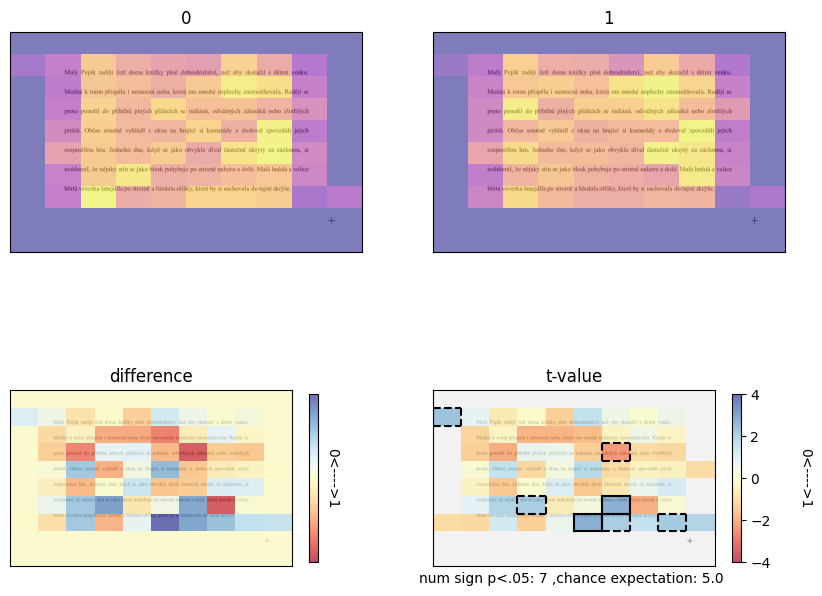

In [35]:
DyslexiaDat.CompareGroupsGridFix(DyslexiaDat.stimuli[1],'class_id', nhor=10, nver=10)

resolution x = 1680  y = 1050
dimensions= (70, 1050, 1680)
reduced dims (70, 132, 210)
Conditions [0 1]
num observers in group 1: 35
num observers in group 2: 35
100 permutations starting


108.12172771188438

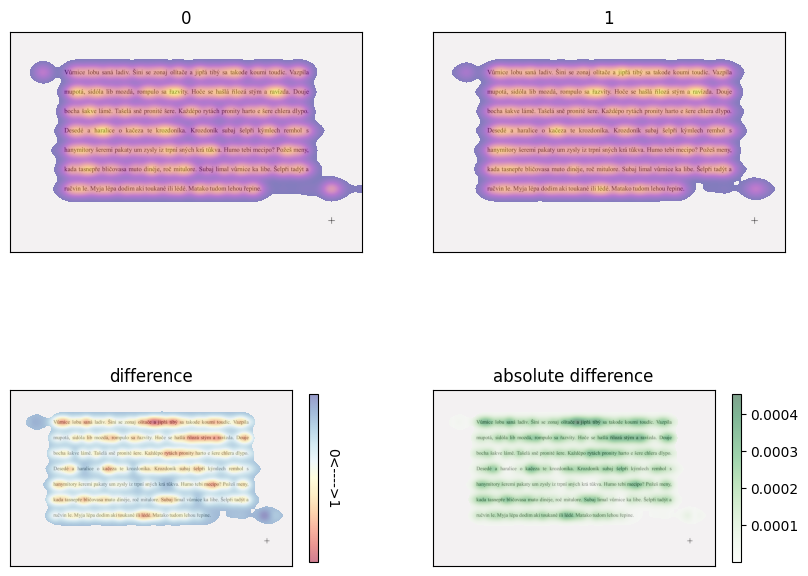

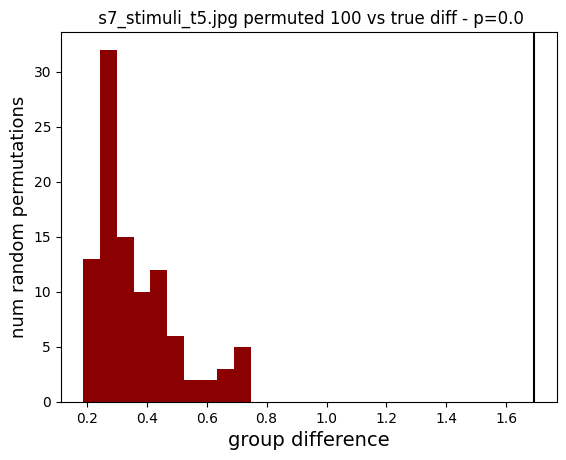

In [22]:
DyslexiaDat.CompareGroupsHeatmap(DyslexiaDat.stimuli[2],'class_id')